In [42]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yfin
import datetime as dt

from sklearn.preprocessing import MinMaxScaler

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

import pickle

In [2]:
start = '2012-01-01'
end = '2022-12-31'
yfin.pdr_override()

df = pdr.get_data_yahoo('AAPL', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.500191,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.567370,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.706892,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.839729,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.819363,394024400


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.412415,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.731918,77034200


In [5]:
df = df.reset_index()

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.500191,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.567370,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.706892,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.839729,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.819363,394024400


In [7]:
df = df.drop(['Date', 'Adj Close'], axis =1)
df.head()

,Open,High,Low,Close,Volume
0,14.621429,14.732143,14.607143,14.686786,302220800
1,14.642857,14.810000,14.617143,14.765714,260022000
2,14.819643,14.948214,14.738214,14.929643,271269600
3,14.991786,15.098214,14.972143,15.085714,318292800
4,15.196429,15.276786,15.048214,15.061786,394024400


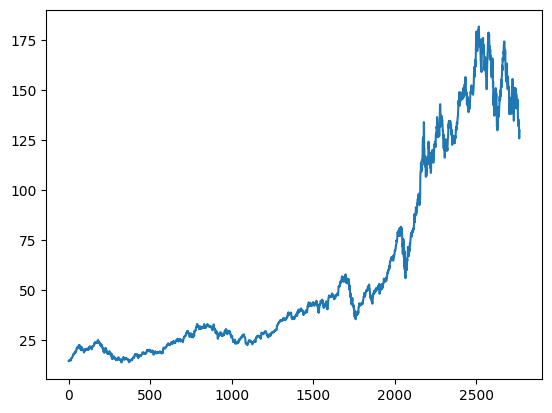

In [8]:
plt.plot(df.Close)

In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763    150.515600
2764    150.157800
2765    149.764699
2766    149.412100
2767    149.062199
Name: Close, Length: 2768, dtype: float64

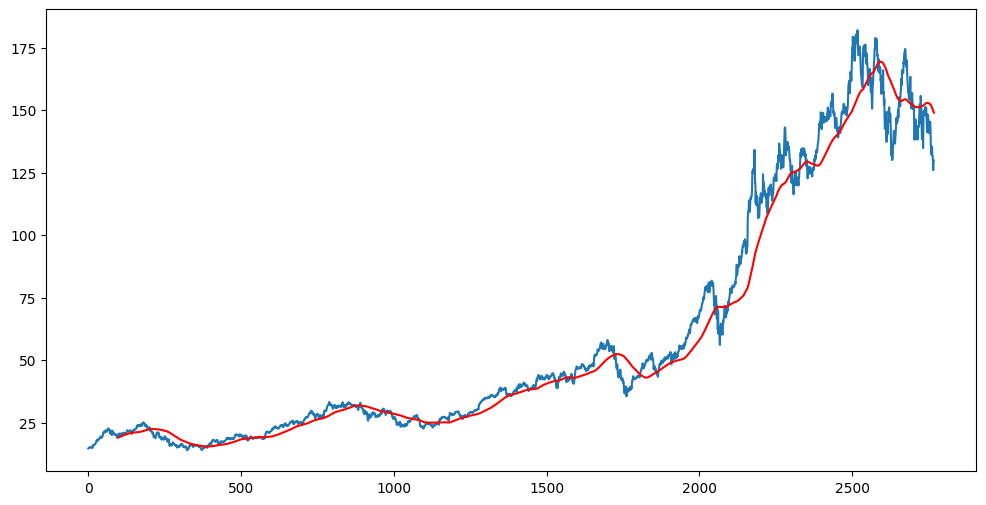

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2763    152.1331
2764    152.0096
2765    151.8867
2766    151.7593
2767    151.6110
Name: Close, Length: 2768, dtype: float64

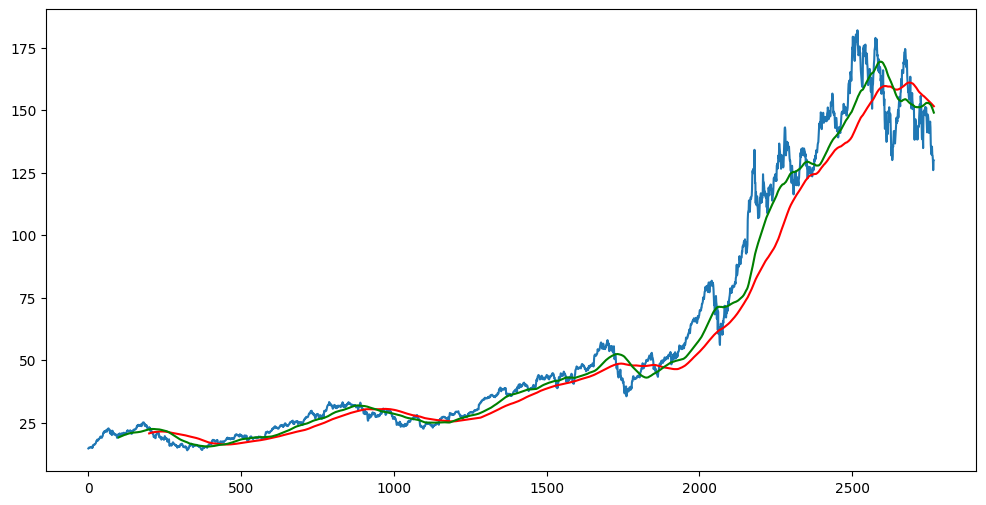

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma200, 'r')
plt.plot(ma100, 'g')

In [13]:
df.shape

(2768, 5)

In [14]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1937, 1)
(831, 1)


In [15]:
data_training.head()

,Close
0,14.686786
1,14.765714
2,14.929643
3,15.085714
4,15.061786


In [16]:
data_testing.head()

,Close
1937,54.974998
1938,55.174999
1939,55.692501
1940,55.240002
1941,54.432499


In [17]:
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
data_training_scaled = scaler.fit_transform(data_training)

In [19]:
data_training_scaled

array([[0.01677525],
       [0.01856622],
       [0.02228596],
       ...,
       [0.95189465],
       [0.94905826],
       [0.92443835]])

In [20]:
data_training_scaled.shape

(1937, 1)

In [21]:
x_train = []
y_train = []

for i in range(100, data_training_scaled.shape[0]):
    x_train.append(data_training_scaled[i-100: i])
    y_train.append(data_training_scaled[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
x_train.shape

(1837, 100, 1)

In [23]:
# ML Model

In [24]:
model = Sequential()
model.add(LSTM(units=50, activation = 'relu', return_sequences = True, 
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))



model.add(LSTM(units=60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))



model.add(LSTM(units=80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [26]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
58/58 [==============================] - 12s 151ms/step - loss: 0.0438
Epoch 2/50
58/58 [==============================] - 9s 149ms/step - loss: 0.0106
Epoch 3/50
58/58 [==============================] - 9s 156ms/step - loss: 0.0072
Epoch 4/50
58/58 [==============================] - 12s 203ms/step - loss: 0.0075
Epoch 5/50
58/58 [==============================] - 11s 191ms/step - loss: 0.0066
Epoch 6/50
58/58 [==============================] - 11s 196ms/step - loss: 0.0063
Epoch 7/50
58/58 [==============================] - 11s 193ms/step - loss: 0.0062
Epoch 8/50
58/58 [==============================] - 11s 193ms/step - loss: 0.0063
Epoch 9/50
58/58 [==============================] - 11s 193ms/step - loss: 0.0053
Epoch 10/50
58/58 [==============================] - 11s 189ms/step - loss: 0.0048
Epoch 11/50
58/58 [==============================] - 11s 189ms/step - loss: 0.0049
Epoch 12/50
58/58 [==============================] - 11s 188ms/step - loss: 0.0053
Epoch 13/50
58/

In [27]:
data_testing.head()

,Close
1937,54.974998
1938,55.174999
1939,55.692501
1940,55.240002
1941,54.432499


In [28]:
past_100_days = data_training.tail(100)

In [29]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22012\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [30]:
final_df.shape

(931, 1)

In [31]:
final_df.head()

,Close
0,51.790001
1,51.320000
2,51.075001
3,51.152500
4,50.167500


In [32]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.06103761],
       [0.05764862],
       [0.05588204],
       [0.05644085],
       [0.04933842],
       [0.0670945 ],
       [0.06462486],
       [0.06931175],
       [0.06341709],
       [0.05328622],
       [0.05335832],
       [0.04942856],
       [0.04304718],
       [0.02238886],
       [0.02768865],
       [0.03176262],
       [0.0302484 ],
       [0.02830154],
       [0.0176479 ],
       [0.0239752 ],
       [0.01708908],
       [0.01146483],
       [0.010221  ],
       [0.00888703],
       [0.0073548 ],
       [0.00901323],
       [0.00319069],
       [0.        ],
       [0.01142877],
       [0.01665643],
       [0.02148754],
       [0.03037457],
       [0.03475502],
       [0.03877491],
       [0.03765728],
       [0.03758516],
       [0.03504345],
       [0.03711648],
       [0.04533655],
       [0.04429101],
       [0.04715724],
       [0.04593142],
       [0.0455709 ],
       [0.04014494],
       [0.04777013],
       [0.04766197],
       [0.04438114],
       [0.050

In [33]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [34]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(831, 100, 1)
(831,)


In [35]:
# making predictions

y_predicted = model.predict(x_test)

26/26 [==============================] - 1s 40ms/step


In [36]:
y_predicted.shape

(831, 1)

In [37]:
scaler.scale_

array([0.00721059])

In [38]:
y_test

array([0.0840033 , 0.08544543, 0.08917692, 0.08591413, 0.08009156,
       0.08187619, 0.08000143, 0.0860403 , 0.08398529, 0.08205647,
       0.09134009, 0.09245772, 0.08230884, 0.08566176, 0.09682012,
       0.09691026, 0.09211521, 0.09685618, 0.10237228, 0.11340449,
       0.11279157, 0.11180014, 0.1100876 , 0.11172801, 0.11376501,
       0.12115585, 0.12016441, 0.12596891, 0.12668998, 0.13209792,
       0.13655046, 0.1261672 , 0.12611312, 0.13602768, 0.14875439,
       0.15178282, 0.15111585, 0.15131411, 0.15526191, 0.15654183,
       0.16025528, 0.15982261, 0.16434727, 0.16104845, 0.1666727 ,
       0.16908823, 0.1676281 , 0.16203988, 0.15991277, 0.15949814,
       0.16777228, 0.1640228 , 0.17042218, 0.16935862, 0.16378845,
       0.155298  , 0.15942602, 0.16634818, 0.17559576, 0.16876377,
       0.1715759 , 0.17570392, 0.17694775, 0.18359952, 0.19208996,
       0.19308145, 0.19187366, 0.19237839, 0.19133288, 0.19955295,
       0.20003964, 0.21020659, 0.21000827, 0.21310883, 0.21694

In [39]:
scale_factor = 1/0.00721059
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

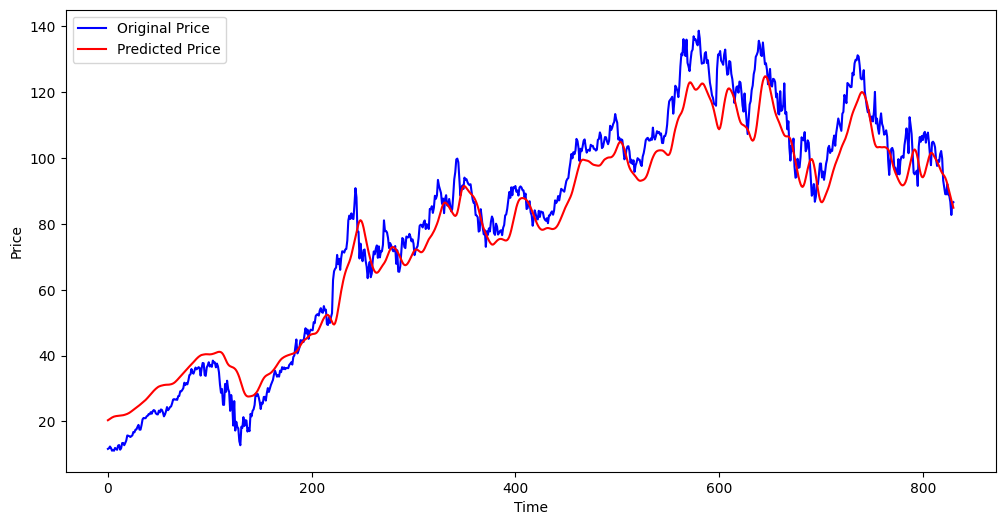

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [43]:
filename = 'stock_price_pred_model'
pickle.dump(model, open(filename, 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dropout_2
......vars
...layers\dropout_3
......vars
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...layers\lstm_2
......vars
...layers\lstm_2\cell
......vars
.........0
.........1
.........2
...layers\lstm_3
......vars
...layers\lstm_3\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........25
.........26
.........27
.........28
.........3
.........4
.........5
.........6
.........7
..

In [44]:
model.save('stock_pred_model.h5')